In [140]:
import numpy as np
import torch

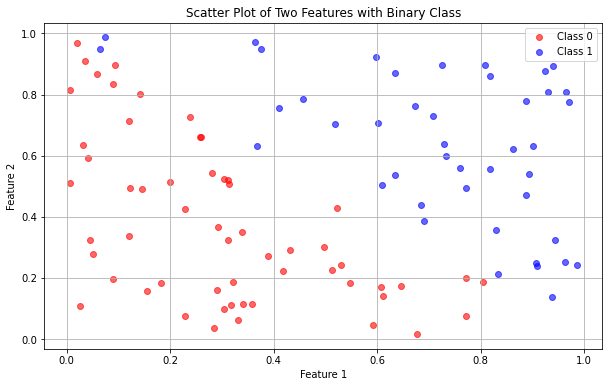

In [141]:

import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)  # For reproducibility
num_samples = 100
X = np.random.rand(num_samples, 2)  # Two features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary class based on a simple rule

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1', alpha=0.6)
plt.title('Scatter Plot of Two Features with Binary Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [142]:
X.shape, y.shape

((100, 2), (100,))

In [143]:
X_t = X.T 

In [144]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def initialize_parameters(n_prev,n):
    W = np.random.randn(n,n_prev)
    b = np.random.randn(n,1)
    W = torch.tensor(W,  requires_grad=True,dtype=float)
    b = torch.tensor(b,  requires_grad=True,dtype=float)
    return W,b
def forward(X,W,b):
    """
    W is ndarray with shape of number of neurons * number of input features(last layer neurons)
    X is ndarray with shape of  number of features * number of dataset
    b is vector of number of neurons * 1"""
    Z = torch.matmul(W,X) + b
    return sigmoid(Z)

In [145]:
W,b = initialize_parameters(2,1)
W,b

(tensor([[-0.6800,  0.2323]], dtype=torch.float64, requires_grad=True),
 tensor([[0.2931]], dtype=torch.float64, requires_grad=True))

In [146]:
X_t = torch.tensor(X_t,dtype=float)
forward(X_t,W,b)[0]

tensor([0.5644, 0.4836, 0.5556, 0.6118, 0.5122, 0.6235, 0.4443, 0.5528, 0.5518,
        0.5167, 0.4774, 0.5448, 0.5412, 0.5687, 0.4753, 0.4799, 0.6152, 0.4562,
        0.5271, 0.4825, 0.5806, 0.6180, 0.5673, 0.5503, 0.4911, 0.4536, 0.4656,
        0.5251, 0.5692, 0.5837, 0.5229, 0.4532, 0.5568, 0.5947, 0.6158, 0.4537,
        0.6174, 0.4954, 0.4467, 0.5190, 0.4628, 0.5207, 0.5392, 0.4863, 0.4500,
        0.5932, 0.4765, 0.4709, 0.5092, 0.5746, 0.6034, 0.5492, 0.4338, 0.5472,
        0.5388, 0.5333, 0.4622, 0.5162, 0.4477, 0.4530, 0.4880, 0.5256, 0.5590,
        0.4842, 0.6004, 0.5152, 0.5720, 0.4322, 0.5259, 0.5675, 0.4248, 0.5062,
        0.5270, 0.4988, 0.5800, 0.4332, 0.5765, 0.4204, 0.5032, 0.5746, 0.5473,
        0.4967, 0.6048, 0.5295, 0.5993, 0.4591, 0.4994, 0.4737, 0.4783, 0.4226,
        0.5219, 0.4671, 0.5673, 0.4666, 0.4973, 0.6078, 0.4571, 0.5358, 0.5019,
        0.4678], dtype=torch.float64, grad_fn=<SelectBackward0>)

In [147]:
lr = 0.1
m = len(X_t[0])
y = torch.tensor(y,dtype=float)
for i in range(10000):
    A = forward(X_t,W,b)[0]
    loss =(1/m) * sum(-y*torch.log(A)-(1-y)* torch.log(1-A))
    loss.backward()
    W.data = W.data - lr* W.grad.data
    b.data = b.data - lr* b.grad.data
    
    W.grad = None
    b.grad = None
    print(loss)

tensor(0.7614, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7600, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7586, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7572, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7558, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7544, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7531, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7517, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7504, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7491, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7478, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7465, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7452, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7439, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7426, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7413, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7400, dtype=torch.float64, grad

tensor(0.5753, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5746, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5739, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5732, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5724, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5710, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5703, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5696, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5689, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5675, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5668, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5661, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5654, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5648, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5641, dtype=torch.float64, grad

tensor(0.4783, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4779, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4775, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4770, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4766, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4761, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4757, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4752, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4748, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4743, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4739, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4735, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4730, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4722, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4713, dtype=torch.float64, grad

tensor(0.4190, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4187, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4184, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4181, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4178, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4174, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4171, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4168, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4165, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4162, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4159, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4156, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4153, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4150, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4147, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4144, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4141, dtype=torch.float64, grad

tensor(0.3672, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3670, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3668, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3665, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3663, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3661, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3657, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3655, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3653, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3649, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3647, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3645, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3643, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3641, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3639, dtype=torch.float64, grad

tensor(0.3314, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3312, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3310, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3309, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3307, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3306, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3304, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3303, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3302, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3300, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3299, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3297, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3296, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3294, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3293, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3291, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3290, dtype=torch.float64, grad

tensor(0.3056, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3055, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3054, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3053, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3052, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3051, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3050, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3048, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3047, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3046, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3045, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3044, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3043, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3041, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3040, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3039, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3038, dtype=torch.float64, grad

tensor(0.2903, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2902, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2901, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2900, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2899, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2898, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2897, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2896, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2895, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2894, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2893, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2892, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2891, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2890, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2889, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2888, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2887, dtype=torch.float64, grad

tensor(0.2751, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2750, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2749, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2749, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2748, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2746, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2745, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2744, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2744, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2743, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2742, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2741, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2740, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2740, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2739, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2738, dtype=torch.float64, grad

tensor(0.2622, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2621, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2620, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2620, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2618, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2617, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2617, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2616, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2615, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2615, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2614, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2612, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2611, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2611, dtype=torch.float64, grad

tensor(0.2515, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2514, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2514, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2513, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2513, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2512, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2511, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2511, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2510, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2510, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2509, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2508, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2508, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2507, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2507, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2506, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2505, dtype=torch.float64, grad

tensor(0.2434, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2433, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2433, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2432, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2432, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2431, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2431, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2430, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2430, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2429, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2428, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2428, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2426, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2426, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2425, dtype=torch.float64, grad

tensor(0.2356, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2355, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2355, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2354, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2354, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2353, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2353, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2352, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2352, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2351, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2351, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2350, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2350, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2349, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2349, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2349, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2348, dtype=torch.float64, grad

tensor(0.2278, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2277, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2277, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2276, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2276, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2274, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2274, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2273, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2273, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2272, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2272, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2272, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2271, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2271, dtype=torch.float64, grad

tensor(0.2200, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2199, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2199, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2199, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2198, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2198, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2197, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2197, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2197, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2196, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2196, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2196, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2195, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2195, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2194, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2194, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2194, dtype=torch.float64, grad

tensor(0.2138, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2137, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2137, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2137, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2136, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2136, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2136, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2135, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2135, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2135, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2134, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2134, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2134, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2133, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2133, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2133, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2132, dtype=torch.float64, grad

tensor(0.2086, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2086, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2085, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2085, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2085, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2084, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2084, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2084, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2084, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2083, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2083, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2083, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2082, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2082, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2082, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2081, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2081, dtype=torch.float64, grad

tensor(0.2026, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2025, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2025, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2025, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2025, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2024, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2024, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2024, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2024, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2023, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2023, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2023, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2022, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2022, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2022, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2022, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2021, dtype=torch.float64, grad

tensor(0.1972, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1972, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1972, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1972, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1971, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1971, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1971, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1971, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1970, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1970, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1970, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1970, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1969, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1969, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1969, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1969, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1968, dtype=torch.float64, grad

tensor(0.1931, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1930, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1930, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1930, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1930, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1929, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1929, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1929, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1929, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1928, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1928, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1928, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1928, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1928, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1927, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1927, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1927, dtype=torch.float64, grad

tensor(0.1894, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1893, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1893, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1893, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1893, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1893, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1892, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1892, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1892, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1892, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1891, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1891, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1891, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1891, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1891, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1890, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1890, dtype=torch.float64, grad

tensor(0.1857, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1857, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1857, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1857, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1857, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1856, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1856, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1856, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1856, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1856, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1855, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1855, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1855, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1855, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1855, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1854, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1854, dtype=torch.float64, grad

tensor(0.1825, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1825, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1825, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1825, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1825, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1824, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1824, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1824, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1824, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1824, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1823, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1823, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1823, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1823, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1823, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1822, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1822, dtype=torch.float64, grad

tensor(0.1793, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1792, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1792, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1792, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1792, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1792, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1792, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1791, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1791, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1791, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1791, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1791, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1791, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1790, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1790, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1790, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1790, dtype=torch.float64, grad

tensor(0.1763, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1763, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1762, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1762, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1762, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1762, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1762, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1762, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1761, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1761, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1761, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1761, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1761, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1761, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1760, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1760, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1760, dtype=torch.float64, grad

tensor(0.1735, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1735, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1735, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1734, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1734, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1734, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1734, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1734, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1734, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1733, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1733, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1733, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1733, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1733, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1733, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1733, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1732, dtype=torch.float64, grad

tensor(0.1709, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1707, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1707, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1707, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1707, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1707, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1707, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1707, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1706, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1706, dtype=torch.float64, grad

tensor(0.1683, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1683, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1683, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1683, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1683, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1683, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1683, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1681, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1681, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1681, dtype=torch.float64, grad

tensor(0.1660, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1660, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1660, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1658, dtype=torch.float64, grad

tensor(0.1635, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1635, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1635, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1635, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1635, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1634, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1634, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1634, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1634, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1634, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1634, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1634, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1634, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1633, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1633, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1633, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1633, dtype=torch.float64, grad

tensor(0.1612, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1611, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1611, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1611, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1611, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1611, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1611, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1611, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1611, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1610, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1610, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1610, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1610, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1610, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1610, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1610, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1610, dtype=torch.float64, grad

tensor(0.1590, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1590, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1590, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1590, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1590, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1590, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1590, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1589, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1589, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1589, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1589, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1589, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1589, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1589, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1589, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1589, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1588, dtype=torch.float64, grad

tensor(0.1571, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1571, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1571, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1571, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1571, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1571, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1571, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1571, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1570, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1570, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1570, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1570, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1570, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1570, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1570, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1570, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1570, dtype=torch.float64, grad

tensor(0.1551, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1551, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1551, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1551, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1551, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1551, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1551, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1551, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1550, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1550, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1550, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1550, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1550, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1550, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1550, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1550, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1550, dtype=torch.float64, grad

tensor(0.1534, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1534, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1533, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1533, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1533, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1533, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1533, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1533, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1533, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1533, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1533, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1533, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1533, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1532, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1532, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1532, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1532, dtype=torch.float64, grad

tensor(0.1516, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1516, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1516, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1516, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1516, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1516, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1516, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1516, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1516, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1516, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1515, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1515, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1515, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1515, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1515, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1515, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1515, dtype=torch.float64, grad

tensor(0.1502, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1502, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1502, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1501, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1501, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1501, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1501, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1501, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1501, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1501, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1501, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1501, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1501, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1501, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1500, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1500, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1500, dtype=torch.float64, grad

tensor(0.1486, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1486, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1486, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1486, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1486, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1486, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1486, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1485, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1485, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1485, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1485, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1485, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1485, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1485, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1485, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1485, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1485, dtype=torch.float64, grad

tensor(0.1470, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1470, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1470, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1470, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1470, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1470, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1470, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1470, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1470, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1470, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1470, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1469, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1469, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1469, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1469, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1469, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1469, dtype=torch.float64, grad

tensor(0.1456, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1456, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1455, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1454, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1454, dtype=torch.float64, grad

tensor(0.1441, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1441, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1441, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1441, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1440, dtype=torch.float64, grad

tensor(0.1428, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1428, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1427, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1426, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1426, dtype=torch.float64, grad

tensor(0.1415, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1415, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1415, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1414, dtype=torch.float64, grad

tensor(0.1403, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1403, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1402, dtype=torch.float64, grad

tensor(0.1391, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1391, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1391, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1391, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1391, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1391, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1391, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1391, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1390, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1390, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1390, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1390, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1390, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1390, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1390, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1390, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1390, dtype=torch.float64, grad

tensor(0.1380, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1380, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1380, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1380, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1380, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1380, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1380, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1380, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1380, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1380, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1379, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1379, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1379, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1379, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1379, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1379, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1379, dtype=torch.float64, grad

tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1368, dtype=torch.float64, grad

tensor(0.1358, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1358, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1358, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1358, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1358, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1357, dtype=torch.float64, grad

tensor(0.1347, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1347, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1347, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1346, dtype=torch.float64, grad

tensor(0.1336, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1336, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1336, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1336, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1336, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1336, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1336, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad

tensor(0.1327, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1327, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1327, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1326, dtype=torch.float64, grad

tensor(0.1318, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1318, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1318, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1318, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1317, dtype=torch.float64, grad

tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1308, dtype=torch.float64, grad

tensor(0.1299, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1298, dtype=torch.float64, grad

tensor(0.1290, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1290, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1289, dtype=torch.float64, grad

tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1282, dtype=torch.float64, grad

tensor(0.1276, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1276, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1276, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad

tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1268, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1267, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1267, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1267, dtype=torch.float64, grad_fn=<MulBackward0>)


In [148]:

X = torch.tensor(X_t,dtype=float)
y_pred = forward(X,W,b)[0]>0.5
y_pred_f = y_pred.type(torch.float) 
y_pred_f

C:\Users\malak\AppData\Local\Temp\ipykernel_15096\2710105077.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X_t,dtype=float)


tensor([1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 0., 0., 1., 0., 1., 1.])

In [149]:
y

tensor([1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 0., 0., 1., 0., 1., 1.], dtype=torch.float64)

In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.96

# add more layers

In [157]:
X_t.shape,y.shape

(torch.Size([2, 100]), torch.Size([100]))

In [159]:
W1,b1 = initialize_parameters(2,5)
W2,b2 = initialize_parameters(5,1)
lr = 0.1
m = len(X_t[0])
y = torch.tensor(y,dtype=float)
for i in range(10000):
    A1 = forward(X_t,W1,b1)
    A2 = forward(A1,W2,b2)[0]
    loss =(1/m) * sum(-y*torch.log(A2)-(1-y)* torch.log(1-A2))
    loss.backward()
    W1.data = W1.data - lr* W1.grad.data
    b1.data = b1.data - lr* b1.grad.data
    W2.data = W2.data - lr* W2.grad.data
    b2.data = b2.data - lr* b2.grad.data
    
    W1.grad = None
    b1.grad = None
    W2.grad = None
    b2.grad = None
    print(loss)

C:\Users\malak\AppData\Local\Temp\ipykernel_15096\934756802.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,dtype=float)


tensor(0.7353, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7273, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7206, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7149, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7102, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7062, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7028, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7000, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6976, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6955, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6937, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6922, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6909, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6897, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6887, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6878, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6870, dtype=torch.float64, grad

tensor(0.6284, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6280, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6276, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6271, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6267, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6263, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6258, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6254, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6250, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6246, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6241, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6237, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6233, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6228, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6224, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6220, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6215, dtype=torch.float64, grad

tensor(0.5369, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5363, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5351, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5345, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5339, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5333, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5327, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5321, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5315, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5309, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5303, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5297, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5291, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5285, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5278, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.5272, dtype=torch.float64, grad

tensor(0.4379, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4373, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4368, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4362, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4357, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4352, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4346, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4341, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4336, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4330, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4325, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4320, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4314, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4309, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4304, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4298, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.4293, dtype=torch.float64, grad

tensor(0.3602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3598, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3594, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3590, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3586, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3582, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3578, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3574, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3570, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3567, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3563, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3559, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3555, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3551, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3547, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3543, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3539, dtype=torch.float64, grad

tensor(0.3071, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3068, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3065, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3062, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3059, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3056, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3053, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3050, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3047, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3044, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3041, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3039, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3036, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3033, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3030, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3027, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.3024, dtype=torch.float64, grad

tensor(0.2670, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2667, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2665, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2663, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2660, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2656, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2654, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2649, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2647, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2645, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2642, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2640, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2638, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2636, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2633, dtype=torch.float64, grad

tensor(0.2336, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2334, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2333, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2331, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2329, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2327, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2326, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2324, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2322, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2321, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2319, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2317, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2315, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2314, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2312, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2310, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2309, dtype=torch.float64, grad

tensor(0.2084, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2082, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2081, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2080, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2078, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2077, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2076, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2074, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2073, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2072, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2070, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2069, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2068, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2067, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2065, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2064, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.2063, dtype=torch.float64, grad

tensor(0.1882, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1881, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1880, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1879, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1878, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1877, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1876, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1875, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1874, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1872, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1871, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1870, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1869, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1868, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1867, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1866, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1865, dtype=torch.float64, grad

tensor(0.1710, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1709, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1707, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1706, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1706, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1705, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1704, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1703, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1702, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1702, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1701, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1700, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1699, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1697, dtype=torch.float64, grad

tensor(0.1584, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1583, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1582, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1582, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1581, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1580, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1580, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1579, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1578, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1578, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1577, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1576, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1576, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1575, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1574, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1574, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1573, dtype=torch.float64, grad

tensor(0.1480, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1479, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1479, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1478, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1478, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1477, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1477, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1476, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1476, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1475, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1475, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1474, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1473, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1473, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1472, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1472, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1471, dtype=torch.float64, grad

tensor(0.1400, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1400, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1399, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1399, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1398, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1398, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1397, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1397, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1397, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1396, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1396, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1395, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1395, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1394, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1394, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1393, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1393, dtype=torch.float64, grad

tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1335, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1334, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1334, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1333, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1333, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1333, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1332, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1332, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1331, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1331, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1331, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1330, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1330, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1329, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1329, dtype=torch.float64, grad

tensor(0.1277, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1276, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1276, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1275, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1274, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1274, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1274, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1273, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1273, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1273, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1272, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1272, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1271, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1271, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1271, dtype=torch.float64, grad

tensor(0.1226, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1226, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1225, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1225, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1225, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1224, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1224, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1224, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1223, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1223, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1223, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1222, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1222, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1222, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1221, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1221, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1221, dtype=torch.float64, grad

tensor(0.1163, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1163, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1162, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1162, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1162, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1162, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1161, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1161, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1161, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1160, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1160, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1160, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1160, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1159, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1159, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1159, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1159, dtype=torch.float64, grad

tensor(0.1123, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1123, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1123, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1123, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1122, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1122, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1122, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1122, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1121, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1121, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1121, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1121, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1120, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1120, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1120, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1120, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1119, dtype=torch.float64, grad

tensor(0.1087, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1087, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1087, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1087, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1086, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1086, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1086, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1086, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1085, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1085, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1085, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1085, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1085, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1084, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1084, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1084, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1084, dtype=torch.float64, grad

tensor(0.1050, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1050, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1050, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1049, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1049, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1049, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1049, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1049, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1048, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1048, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1048, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1048, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1048, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1047, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1047, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1047, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1047, dtype=torch.float64, grad

tensor(0.1019, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1019, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1019, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1019, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1018, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1018, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1018, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1018, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1018, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1018, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1017, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1017, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1017, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1017, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1017, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1016, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1016, dtype=torch.float64, grad

tensor(0.0990, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0990, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0990, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0990, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0990, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0989, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0989, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0989, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0989, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0989, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0989, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0988, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0988, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0988, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0988, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0988, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0988, dtype=torch.float64, grad

tensor(0.0965, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0964, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0964, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0964, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0964, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0964, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0964, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0963, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0963, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0963, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0963, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0963, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0963, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0963, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0962, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0962, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0962, dtype=torch.float64, grad

tensor(0.0941, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0941, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0941, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0941, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0940, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0940, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0940, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0940, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0940, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0940, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0940, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0939, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0939, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0939, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0939, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0939, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0939, dtype=torch.float64, grad

tensor(0.0917, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0917, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0917, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0917, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0917, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0917, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0917, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0917, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0916, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0916, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0916, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0916, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0916, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0916, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0916, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0915, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0915, dtype=torch.float64, grad

tensor(0.0895, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0895, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0895, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0895, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0895, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0895, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0894, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0894, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0894, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0894, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0894, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0894, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0894, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0894, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0893, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0893, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0893, dtype=torch.float64, grad

tensor(0.0877, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0877, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0877, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0877, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0876, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0876, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0876, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0876, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0876, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0876, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0876, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0876, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0876, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0876, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0875, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0875, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0875, dtype=torch.float64, grad

tensor(0.0860, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0860, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0860, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0860, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0859, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0859, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0859, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0859, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0859, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0859, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0859, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0859, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0859, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0859, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0858, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0858, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0858, dtype=torch.float64, grad

tensor(0.0843, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0843, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0843, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0843, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0842, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0842, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0842, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0842, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0842, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0842, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0842, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0842, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0842, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0842, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0842, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0841, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0841, dtype=torch.float64, grad

tensor(0.0827, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0827, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0827, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0827, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0827, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0827, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0827, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0827, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0827, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0827, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0827, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0826, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0826, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0826, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0826, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0826, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0826, dtype=torch.float64, grad

tensor(0.0811, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0811, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0811, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0811, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0811, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0811, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0811, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0811, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0811, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0810, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0810, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0810, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0810, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0810, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0810, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0810, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0810, dtype=torch.float64, grad

tensor(0.0797, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0797, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0797, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0797, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0797, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0796, dtype=torch.float64, grad

tensor(0.0784, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0784, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0784, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0784, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0784, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0784, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0784, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0784, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0784, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0784, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0784, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0783, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0783, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0783, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0783, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0783, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0783, dtype=torch.float64, grad

tensor(0.0771, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0771, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0771, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0771, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0771, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0771, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0771, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0771, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0771, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0771, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0770, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0770, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0770, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0770, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0770, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0770, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0770, dtype=torch.float64, grad

tensor(0.0759, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0759, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0759, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0758, dtype=torch.float64, grad

tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0747, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0746, dtype=torch.float64, grad

tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0735, dtype=torch.float64, grad

tensor(0.0726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0726, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0725, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0725, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0725, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0725, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0725, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0725, dtype=torch.float64, grad

tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0717, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0716, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0716, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0716, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0716, dtype=torch.float64, grad

tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0708, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0707, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0707, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0707, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0707, dtype=torch.float64, grad

tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0698, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0697, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0697, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0697, dtype=torch.float64, grad

tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0690, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0689, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0689, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0689, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0689, dtype=torch.float64, grad

tensor(0.0682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0682, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0681, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0681, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0681, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0681, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0681, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0681, dtype=torch.float64, grad

tensor(0.0674, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0674, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0674, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0674, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0673, dtype=torch.float64, grad

tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0666, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0665, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0665, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0665, dtype=torch.float64, grad

tensor(0.0659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0659, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0658, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0658, dtype=torch.float64, grad

tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0651, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0650, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0650, dtype=torch.float64, grad

tensor(0.0644, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0644, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0644, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0644, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0644, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0644, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0643, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0643, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0643, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0643, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0643, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0643, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0643, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0643, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0643, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0643, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0643, dtype=torch.float64, grad

tensor(0.0638, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0638, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0638, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0638, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0638, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0638, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0638, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0637, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0637, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0637, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0637, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0637, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0637, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0637, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0637, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0637, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0637, dtype=torch.float64, grad

tensor(0.0632, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0632, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0632, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0632, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0631, dtype=torch.float64, grad

tensor(0.0626, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0625, dtype=torch.float64, grad

tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0619, dtype=torch.float64, grad

tensor(0.0614, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0614, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0614, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0614, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0614, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0613, dtype=torch.float64, grad

tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0608, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0607, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0607, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0607, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0607, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0607, dtype=torch.float64, grad

tensor(0.0603, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0603, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0603, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0603, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0603, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0602, dtype=torch.float64, grad

tensor(0.0598, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0598, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0598, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0598, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0598, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0598, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0598, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0598, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0597, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0597, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0597, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0597, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0597, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0597, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0597, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0597, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0597, dtype=torch.float64, grad

tensor(0.0593, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0593, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0593, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0593, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0593, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0593, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0592, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0592, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0592, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0592, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0592, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0592, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0592, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0592, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0592, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0592, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0592, dtype=torch.float64, grad

tensor(0.0588, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0588, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0588, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0588, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0588, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0587, dtype=torch.float64, grad

In [167]:

X = torch.tensor(X_t,dtype=float)
A1 = forward(X_t,W1,b1)
A2 = forward(A1,W2,b2)[0]
y_pred = A2>0.5
y_pred_f = y_pred.type(torch.float) 
accuracy_score(y,y_pred)


C:\Users\malak\AppData\Local\Temp\ipykernel_15096\668960358.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X_t,dtype=float)


0.98

# add more layers made the accuracy increase from 96% to 98%